In [1]:
import os
import tarfile
import urllib

In [2]:
# 깔금한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [3]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets",'housing')
HOUSING_URL = DOWNLOAD_ROOT + 'datasets/housing/housing.tgz'

tarfile참고자료 : https://python.flowdas.com/library/tarfile.html

In [4]:
def fetch_housing_data(housing_url = HOUSING_URL,housing_path = HOUSING_PATH):
    os.makedirs(housing_path,exist_ok = True) 
    # 폴더 생성 경로에 폴더가 없을 경우 자동으로 생성해주는 mkdir -p옵션을 이용할 수 있는 파이썬 코드가
    # makedirs(exist_ok = True) 이다.
    tgz_path = os.path.join(housing_path,'housing.tgz')
    urllib.request.urlretrieve(housing_url,tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path = housing_path)
    housing_tgz.close()

In [5]:
fetch_housing_data()

In [6]:
import pandas as pd
def load_housing_data(housing_path = HOUSING_PATH):
    csv_path = os.path.join(housing_path,'housing.csv')
    return pd.read_csv(csv_path)

##### 데이터 구조 훑어보기

In [7]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [8]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
housing.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [10]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


C:\Anaconda\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Anaconda\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Anaconda\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Anaconda\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
T

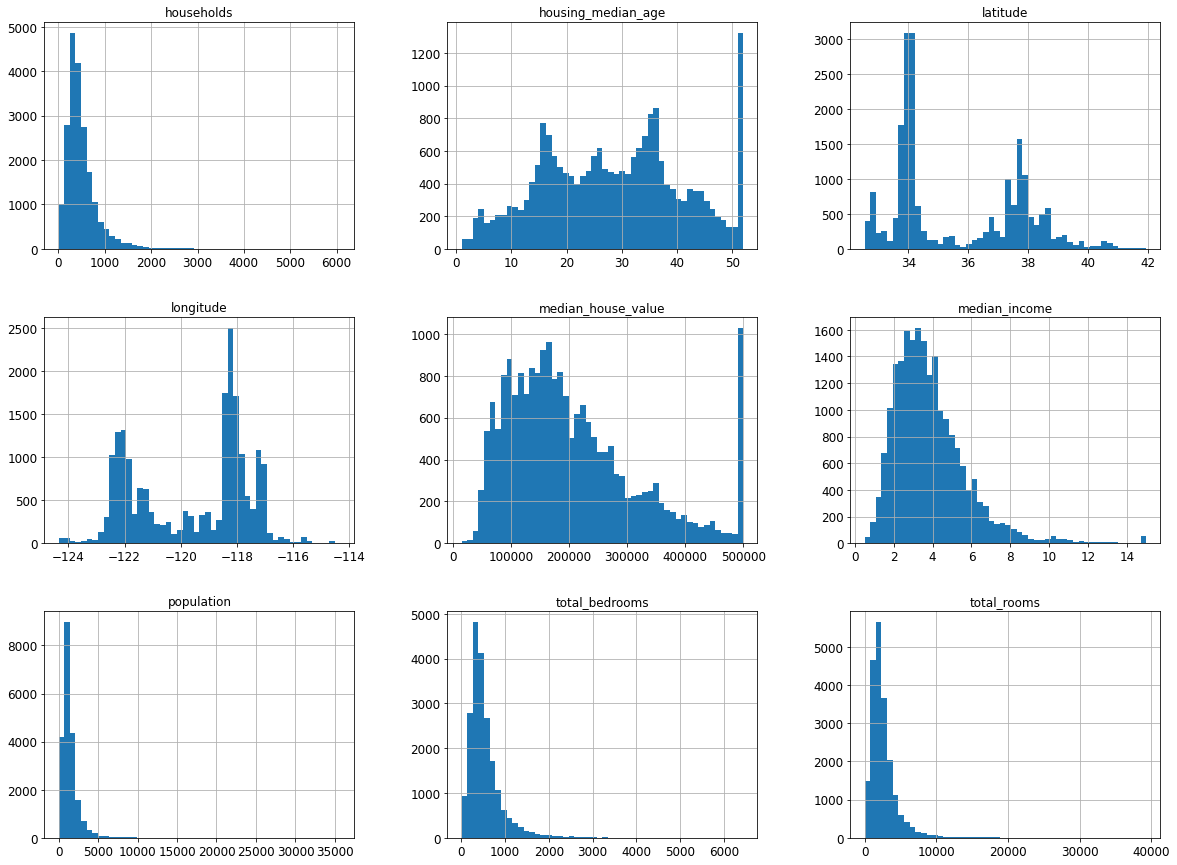

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins = 50,figsize = (20,15))
plt.show()

##### 테스트 세트 만들기

In [12]:
import numpy as np

In [13]:
np.random.permutation(3)

array([1, 0, 2])

In [14]:
def split_train_test(data,test_ratio):
    shuffled_indices = np.random.permutation(len(data)) # 0부터 len(data)까지의 숫자배열 무작위로 섞는 것!
    # 참고자료 : https://hashcode.co.kr/questions/8457/%ED%8C%8C%EC%9D%B4%EC%8D%AC-%EB%84%98%ED%8C%8C%EC%9D%B4%EC%97%90%EC%84%9C-shuffle%EC%99%80-permutation%EC%9D%98-%EC%97%AD%ED%95%A0%EC%B0%A8%EC%9D%B4
    
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]

In [15]:
train_set, test_set = split_train_test(housing,0.2)

In [16]:
len(train_set)

16512

In [17]:
len(test_set)

4128

위 방법은 괜찮지만 프로그램을 다시 실행하면 다른 테스트 세트가 생성됩니다!.<br> 여러번 계속하면 전체 데이터셋을 보는 셈이므로 이를 피해야합니다.

해결책1) : 처음 실행에서 테스트 세트를 저장하고 다음번 실행에서 이를 불러오는 것
<br>해결책2) : 난수 설정(ex. np.random.seed(42))

But. 이 두 해법 모두 다음번에 업데이트된 데이터 셋을 사용하려면 문제가 됩니다.<br>
데이터셋을 업데이트 한 후에도 안정적인 훈련/테스트 분할을 위한 <b>일반적인 해결책은 샘플의 식별자를 사용하여 테스트 세트를 보낼지 말지 정하는 것입니다.</b> <br>
예를 들어 <b>각 샘플마다 식별자의 해시값을 계산하여 해시 최대값보다 20% 작거나 같은 샘플만 테스트 세트로 보낼 수 있습니다. </b>이렇게 하면 여러 번 반복 실행되면서 데이터셋이 갱신되더라도 테스트 세트가 동일하게 유지됩니다.

In [18]:
from zlib import crc32

def test_set_check(identifier,test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2 **32

In [19]:
def split_train_test_by_id(data,test_ratio,id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_ : test_set_check(id_,test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [20]:
# housing데이터 셋에 식별자 컬럼이 없으므로 행인덱스를 ID로 사용
housing_with_id = housing.reset_index()
train_set, test_set = split_train_test_by_id(housing_with_id,0.2,'index')

In [21]:
# 위도, 경도를 ID로 쓰자
housing_with_id['id'] = housing.longitude*1000 + housing.latitude
train_set, test_set = split_train_test_by_id(housing_with_id,0.2,'id')

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
train_set, test_set = train_test_split(housing,test_size = 0.2,random_state = 42)

In [24]:
housing['income_cat'] = pd.cut(housing['median_income'],bins = [0.,1.5,3.0,4.5,6.,np.inf],labels = [1,2,3,4,5])

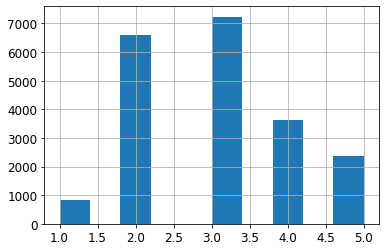

In [25]:
housing['income_cat'].hist()

n_split에 대한 이해, 참고자료 : https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html

In [26]:
from sklearn.model_selection import StratifiedShuffleSplit # 계층 샘플링

In [27]:
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2 ,random_state = 42)
for train_index, test_index in split.split(housing,housing['income_cat']): # split(X,y)
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [28]:
# 계층 샘플링.. test 셋에 있는 소득 카테고리의 비율.
strat_test_set['income_cat'].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [29]:
# 전체 데이터 셋에 있는 소득 카테고리의 비율
housing.income_cat.value_counts() / housing.shape[0]

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

income_cat 특성을 삭제해서 데이터를 원래 상태로 되돌리겠습니다.

In [30]:
for set_ in (strat_train_set,strat_test_set):
    set_.drop('income_cat',axis= 1,inplace = True)

##### 2.4 데이터 이해를 위한 탐색과 시각화 

In [31]:
housing  = strat_train_set.copy()

##### 2.4.1 지리적 데이터 시각화

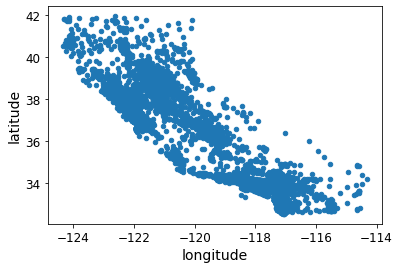

In [32]:
housing.plot(kind ='scatter',x= 'longitude',y = 'latitude')

그림 저장: better_visualization_plot


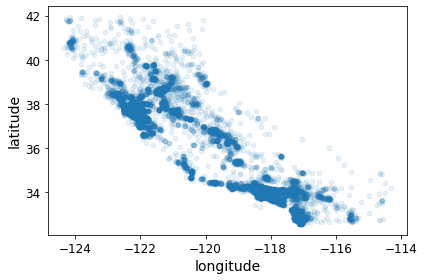

In [33]:
# alpha : 점들의 투명도 ~ 낮을 수록 희미함..
housing.plot(kind ='scatter',x= 'longitude',y = 'latitude',alpha = 0.1)
save_fig('better_visualization_plot') # 그림 저장


sharex=False 매개변수는 x-축의 값과 범례를 표시하지 못하는 버그를 수정합니다. 이는 임시 방편입니다(https://github.com/pandas-dev/pandas/issues/10611 참조). 수정 사항을 알려준 Wilmer Arellano에게 감사합니다.

* 매개변수 설명
- s : 원의 반지름
- c : 가격을 나타냅니다.(높고 낮은 정도)
- cmap : 미리 정의된 컬러맵을 불러옴.

C:\Anaconda\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Anaconda\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Anaconda\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Anaconda\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
T

그림 저장: housing_prices_scatterplot


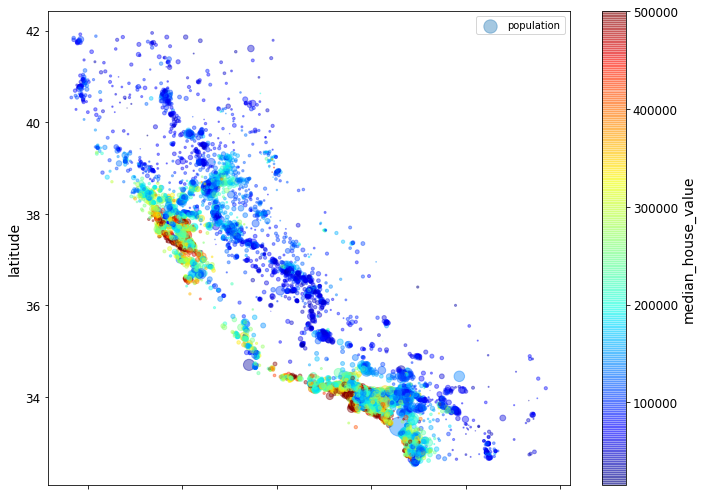

In [34]:
housing.plot(kind ='scatter', x = 'longitude',y = 'latitude',alpha = 0.4,s = housing['population']/100,label = 'population',
            figsize = (10,7),c = 'median_house_value',cmap = plt.get_cmap('jet'),colorbar = True)
save_fig('housing_prices_scatterplot')

주택 가격은 지역(예를 들면 바다와 인접한 곳)과 인구 밀도에 관련이 매우 크다는 사실을 알 수 있습니다.<br>
군집 알고리즘을 사용해 주요 군집을 찾고 군집의 중심까지의 거리를 재는 특성을 추가할 수 있습니다. 해안 근접성 특성이 유용할 수도 있지만, 북부 캘리포니아 지역(그림의 좌측 상단)의 해안가는 주택가격이 그리 높지 않아 간단한 규칙이 적용되기 어렵습니다.

##### 추가적으로 github에 나와있는 코드

In [35]:
# Download the California image
images_path = os.path.join(PROJECT_ROOT_DIR, "images", "end_to_end_project")
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "california.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/end_to_end_project/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

('.\\images\\end_to_end_project\\california.png',
 <http.client.HTTPMessage at 0xcf7075de08>)

그림 저장: california_housing_prices_plot


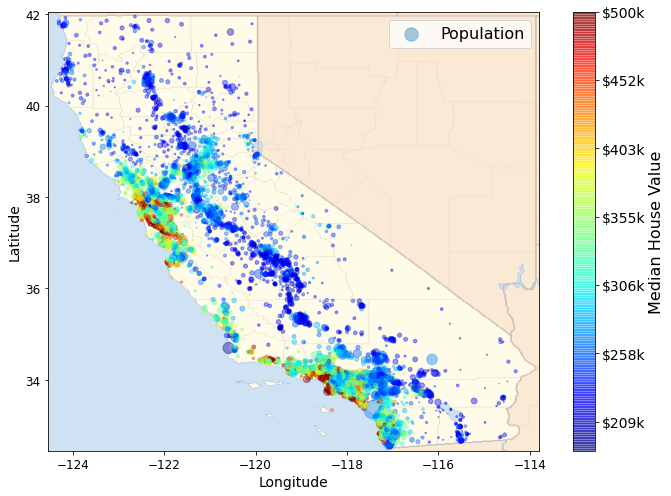

In [36]:
import matplotlib.image as mpimg
california_img=mpimg.imread(os.path.join(images_path, filename))
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                       s=housing['population']/100, label="Population",
                       c="median_house_value", cmap=plt.get_cmap("jet"),
                       colorbar=False, alpha=0.4,
                      )
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar(ticks=tick_values/prices.max())
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
save_fig("california_housing_prices_plot")
plt.show()

##### 2.4.2 상관관계 조사

In [37]:
corr_matrix = housing.corr()

In [38]:
corr_matrix['median_house_value'].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

상관계수는 선형적인 상관관계만 측정합니다. 따라서 비선형적인 관계는 잡을 수 없습니다.(Mutual Information 파악해보자)<br>
상관계수는 기울기와 상관이 없습니다.

In [39]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000CF700C2DC8>,
      dtype=object)

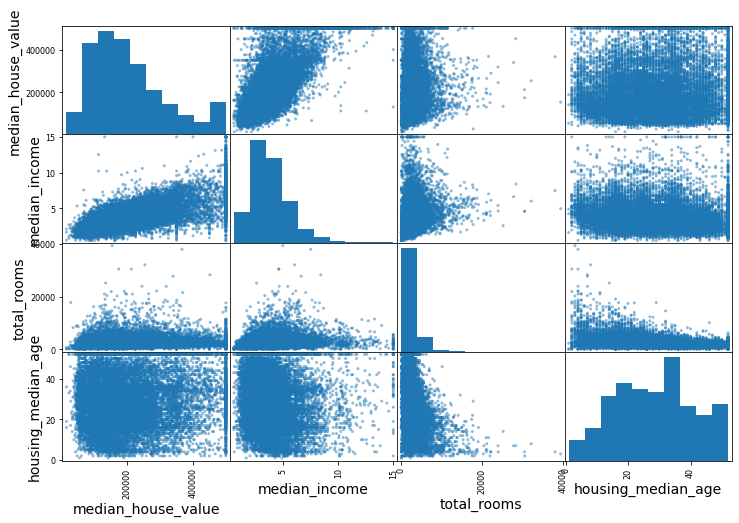

In [40]:
attributes = ['median_house_value','median_income','total_rooms','housing_median_age']
scatter_matrix(housing[attributes],figsize  = (12,8))

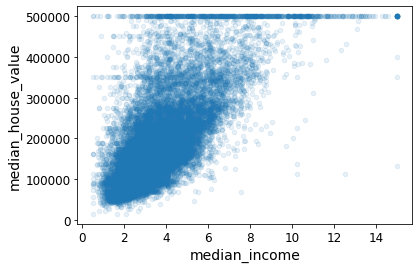

In [41]:
housing.plot(kind  = 'scatter',x = 'median_income',y = 'median_house_value',alpha = 0.1)

* 그래프로 부터 얻은 사실
1. 상관관계가 매우 강하다
2. 500,000달러 에서 수평선으로 잘 보입니다. <br>하지만 이 그래프에서 직선에 가까운 형태를 더 볼 수 있습니다. 450,000 달러 근처에 수평선이 보이고 350,000 달러와 280,000 달러에 있고 그 아래 조금 더 보입니다. <b> 알고리즘이 데이터에서 이런 이상한 형태를 학습하지 않도록 해당 구역을 제거하는 것이 좋습니다.</b>

In [42]:
housing['rooms_per_household'] = housing['total_rooms'] / housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms'] / housing['total_rooms']
housing['population_per_household'] = housing['population'] / housing['households']

In [43]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending = False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

#### 2.5 머신러닝 알고리즘을 위한 데이터 준비

In [44]:
housing = strat_train_set.drop('median_house_value',axis = 1)
housing_labels = strat_train_set['median_house_value'].copy()

In [45]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,INLAND
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,INLAND
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,INLAND
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,<1H OCEAN


In [46]:
housing.dropna(subset = ['total_bedrooms']) # 해당 구역을 제거합니다 : 특정 열의 NaN이 들어간 행을 제거한다!

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,INLAND
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,INLAND
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,INLAND
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,<1H OCEAN


In [47]:
housing.drop('total_bedrooms',axis = 1) # 전체 특성을 제거

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,4459.0,1463.0,3.0347,<1H OCEAN
...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,573.0,210.0,4.9312,INLAND
12053,-117.56,33.88,40.0,1196.0,1052.0,258.0,2.0682,INLAND
13908,-116.40,34.09,9.0,4855.0,2098.0,765.0,3.2723,INLAND
11159,-118.01,33.82,31.0,1960.0,1356.0,356.0,4.0625,<1H OCEAN


In [48]:
# 채워넣는다!
median = housing['total_bedrooms'].median() 
housing['total_bedrooms'].fillna(median) # inplace = True) # 책은 이것으로 한다!

17606     351.0
18632     108.0
14650     471.0
3230      371.0
3555     1525.0
          ...  
6563      236.0
12053     294.0
13908     872.0
11159     380.0
15775     682.0
Name: total_bedrooms, Length: 16512, dtype: float64

##### 주의사항
- 계산한 중간값을 저장하는 것을 잊지 마세요. 나중에 시스템을 평가할 때 테스트 세트에 있는 누락된 값과 시스템이 실제 운영될 때 새로운 데이터에 있는 누락된 값을 채워넣는데 필요하기 때문입니다.<br>
이때 훈련 세트에서 학습한 것이 소용없어지므로 <b> 테스트 세트의 중간값을 사용하면 안됩니다!!</b>

Sklearn SimpleImputer사용

In [49]:
from sklearn.impute import SimpleImputer

In [50]:
imputer = SimpleImputer(strategy='median')

In [51]:
# 수치형 데이터 특성에만 적용가능하므로 텍스트 특성인 Ocean_proximity를 제외한 데이터 복사본을 생성합니다.
housing_num = housing.drop('ocean_proximity',axis = 1)

In [52]:
imputer.fit(housing_num) # 훈련 데이터에 적용, 객체 생성

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

각 특성의 중간값을 계산해서 그 결과를 객체의 statistics_속성에 저장합니다.

In [53]:
imputer.statistics_  # 기존 데이터 열의 순서대로 출력된다.

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [54]:
housing_num.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347


In [55]:
housing_num.median()

longitude             -118.5100
latitude                34.2600
housing_median_age      29.0000
total_rooms           2119.5000
total_bedrooms         433.0000
population            1164.0000
households             408.0000
median_income            3.5409
dtype: float64

모든 추정기의 하이퍼파라미터는 공개 인스턴스 변수로 직접 접근할 수 있다.

In [56]:
# imputer의 하이퍼파라미터인 strategy가 어떻게 쓰였는지 바로 접근 가능
imputer.strategy

'median'

In [57]:
# Imputer객체를 사용해 룬련 세트에서 누락된 값을 학습한 중간값으로 바꾼다.
X = imputer.transform(housing_num) # 넘파이 배열. 그리고 기존 데이터 테이블 형태 그대로 출력된다.

In [58]:
# 기존 데이터 형태 그대로 출력되는 모습 -> 첫 번째 원소 : 기존 데이터의 1행, 두 번째 원소 : 기존 데이터의 2행...
X

array([[-121.89  ,   37.29  ,   38.    , ...,  710.    ,  339.    ,
           2.7042],
       [-121.93  ,   37.05  ,   14.    , ...,  306.    ,  113.    ,
           6.4214],
       [-117.2   ,   32.77  ,   31.    , ...,  936.    ,  462.    ,
           2.8621],
       ...,
       [-116.4   ,   34.09  ,    9.    , ..., 2098.    ,  765.    ,
           3.2723],
       [-118.01  ,   33.82  ,   31.    , ..., 1356.    ,  356.    ,
           4.0625],
       [-122.45  ,   37.77  ,   52.    , ..., 1269.    ,  639.    ,
           3.575 ]])

In [59]:
housing_tr = pd.DataFrame(X, columns = housing_num.columns,index = housing_num.index)

In [60]:
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347
...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625


##### 2.5.2 텍스트와 범주형 특성 다루기

In [61]:
housing_cat = housing.ocean_proximity
housing_cat.head(10) # 범주형 특성

17606     <1H OCEAN
18632     <1H OCEAN
14650    NEAR OCEAN
3230         INLAND
3555      <1H OCEAN
19480        INLAND
8879      <1H OCEAN
13685        INLAND
4937      <1H OCEAN
4861      <1H OCEAN
Name: ocean_proximity, dtype: object

대부분의 머신러닝 알고리즘은 숫자를 다루므로 이 카테고리를 텍스트에서 숫자로 변환하겠다. Sklearn의 OrdinalEncoder 클래스를 사용

In [62]:
from sklearn.preprocessing import OrdinalEncoder

In [63]:
import sklearn

In [64]:
sklearn.__version__

'0.21.3'

오류 발생 : <br>
ValueError: Expected 2D array, got 1D array instead:<br>
array=['<1H OCEAN' '<1H OCEAN' 'NEAR OCEAN' ... 'INLAND' '<1H OCEAN' 'NEAR BAY'].<br>
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.<br>

모델이 2차원 형태를 기대했었는데, input이 1차원이 나온다면 오류를 발생 <br>
-> 1차원 배열을 넣고 싶으면 <br> 
1) 출력값을 <b>행 방향</b>으로 나오게끔 하고 싶으면 <b>reshape(1,-1)</b> 활용 <br>
2) 출력값을 <b>열 방향</b>으로 나오게끔 하고 싶으면 <b>reshape(-1,1)</b> 활용

In [65]:
housing_cat.values.reshape(1,-1)

array([['<1H OCEAN', '<1H OCEAN', 'NEAR OCEAN', ..., 'INLAND',
        '<1H OCEAN', 'NEAR BAY']], dtype=object)

In [66]:
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat.values.reshape(-1,1))
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

##### 내 방식으로 인코딩해보자
1. category로 data type 변환 후 접근

In [67]:
Test1 = housing_cat.astype('category')
Test1

17606     <1H OCEAN
18632     <1H OCEAN
14650    NEAR OCEAN
3230         INLAND
3555      <1H OCEAN
            ...    
6563         INLAND
12053        INLAND
13908        INLAND
11159     <1H OCEAN
15775      NEAR BAY
Name: ocean_proximity, Length: 16512, dtype: category
Categories (5, object): [<1H OCEAN, INLAND, ISLAND, NEAR BAY, NEAR OCEAN]

Test1.cat.codes 설명<br>
"Categories (5, object): [<1H OCEAN, INLAND, ISLAND, NEAR BAY, NEAR OCEAN] " 나온 순서대로 0,1,2,3,4를 Mapping시킴

In [68]:
Test1.cat.codes 

17606    0
18632    0
14650    4
3230     1
3555     0
        ..
6563     1
12053    1
13908    1
11159    0
15775    3
Length: 16512, dtype: int8

Dict형태로 변환시킴. 

In [69]:
Test1_dict = dict(zip(Test1,Test1.cat.codes))
Test1_dict

{'<1H OCEAN': 0, 'NEAR OCEAN': 4, 'INLAND': 1, 'NEAR BAY': 3, 'ISLAND': 2}

apply함수 써서 적용

In [70]:
Test1.apply(lambda x : Test1_dict[x])

17606    0
18632    0
14650    4
3230     1
3555     0
        ..
6563     1
12053    1
13908    1
11159    0
15775    3
Name: ocean_proximity, Length: 16512, dtype: category
Categories (5, int64): [0, 1, 2, 3, 4]

2번째 방식은 1번째 방식과 유사, Pandas자체에 cat으로 접근하지 않고 unique한 값을 뽑아서 dict만들어서 apply쓰는건 동일.

##### 이어서

categories_ 인스턴스 변수를 사용해 카테고리 목록을 얻을 수 있습니다.<br>
범주형 특성마다 카테고리들의 1D 배열을 담은 리스트가 반환됩니다.<br>
(이 경우는 범주혀 특성이 하나만 있으므로 배열 하나를 담은 리스트가 반환됩니다.)

In [71]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

위 표현 방식의 문제는 머신러닝 알고리즘이 가까이 있는 두 값이 떨어져 있는 두 값보다 더 비슷하다고 생각한다는 점입니다.<br>
EX)<br>
카테고리 0과 1보다, 카테고리0과 4가 확실히 더 비슷한데.. 0과 1이 단순히 가까운 숫자라고 생각해서 비슷하지 않을까..?<br>

이를 방지하기 위해 One-hot Encoding을 실시.. 이때 Spare Matrix로 표현되게 한다.<br>

만약 카테고리 특성이 너무 많으면 One-hot Encoding은 많은 수의 입력 특성을 만듭니다. 이는 훈련을 느리게 한다. 따라서 Embedding이라고 학습가능한 저차원의 벡터로 바꿀 수 있습니다. 이는 표현학습(Representation learning)의 한 예입니다.

In [73]:
from sklearn.preprocessing import OneHotEncoder

In [75]:
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat.values.reshape(-1,1))
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

넘파이 배열로 호출하려면 toarray()활용

In [76]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [77]:
# 인스턴스 변수를 활용해 카테고리 리스트를 얻을 수 있습니다.
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

#### 2.5.3 나만의 변환기 만들기

사이킷런이 유용한 변환기를 많이 제공하지만 <b>특별한 정제 작업이나 어떤 특성들을 조합하는 등의 작업을 위해 자신만의 변환기를 만들어야 할 때가 있습니다.</b> 내마 만든 변환기를 (파이프라인과 같은) 사이킷런의 기능과 매끄럽게 연동하고 싶을 것입니다. 사이킷런은 (상속이 아닌) 덕 타이핑을 지원하므로 fit(), transform(),fit_transform() 메서드를 구현한 파이썬 클래스를 만들면 됩니다.
<br><br>

<b>TransformerMixin</b>을 상속 -> fit_transform()메서드를 자동으로 생성합니다.<br>
TransformerMixin은 fit_transform()메서드 하나를 가지고 있으며 이를 상속하는 모든 파이썬 클래스에 이 메서드를 제공합니다.<br>

<b>BaseEstimator</b>을 상속 & 생성자에 *args나 * * kwargs를 사룡하지 않으면 <br>하이퍼 파라미터 튜닝에 필요한 두 메서드(get_params()와 set_params())를 추가로 얻는다
<br> get_params()와 set_params()함수는 사이킷런의 파이프라인과 그리드 탐색에 꼭 필요한 메서드이므로 모든 추정기와 변환기는 BaseEstimator를 상속해야 합니다. 이 두 메서드는 생성자에 명시된 매개변수만을 참조하므로 *args나 * * kwargs는 사용할 수 없습니다.

In [78]:
from sklearn.base import BaseEstimator, TransformerMixin

In [79]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN


In [84]:
rooms_ix, bedrooms_ix, population_ix,households_ix = 3,4,5,6 # 열의 순서 숫자(파이썬이니까 0부터)

In [85]:
class CombineAttributesAdder(BaseEstimator,TransformerMixin):
    def __init__(self,add_bedrooms_per_room = True): 
        self.add_bedrooms_per_room = add_bedrooms_per_room
        
    def fit(self,X,y=None):
        return self # 더 할일이 없습니다. So,여기서 더 칠게 없다.
    
    def transform(self,X):
        rooms_per_household = X[:,rooms_ix] / X[:,households_ix]
        population_per_household = X[:,population_ix] / X[:,households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:,bedrooms_ix] / X[:,rooms_ix]
            return np.c_[X,rooms_per_household,population_per_household,bedrooms_per_room]
        
        else:
            return np.c_[X,rooms_per_household,population_per_household]

In [86]:
attr_adder = CombineAttributesAdder(add_bedrooms_per_room = False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [87]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN


In [91]:
pd.DataFrame(housing_extra_attribs)

,0,1,2,3,4,5,6,7,8,9,10
0,-121.89,37.29,38,1568,351,710,339,2.7042,<1H OCEAN,4.62537,2.0944
1,-121.93,37.05,14,679,108,306,113,6.4214,<1H OCEAN,6.00885,2.70796
2,-117.2,32.77,31,1952,471,936,462,2.8621,NEAR OCEAN,4.22511,2.02597
3,-119.61,36.31,25,1847,371,1460,353,1.8839,INLAND,5.23229,4.13598
4,-118.59,34.23,17,6592,1525,4459,1463,3.0347,<1H OCEAN,4.50581,3.04785
...,...,...,...,...,...,...,...,...,...,...,...
16507,-118.13,34.2,46,1271,236,573,210,4.9312,INLAND,6.05238,2.72857
16508,-117.56,33.88,40,1196,294,1052,258,2.0682,INLAND,4.63566,4.07752
16509,-116.4,34.09,9,4855,872,2098,765,3.2723,INLAND,6.34641,2.74248
16510,-118.01,33.82,31,1960,380,1356,356,4.0625,<1H OCEAN,5.50562,3.80899


#### 2.5.4 특성 스케일링

- 머신러닝 알고리즘은 입력 숫자 특성들의 스케일이 많이 다르면 잘 작동하지 않습니다.<br>
몇 가지는 빼고..(트리 기반 알고리즘)
- 타깃값에 대한 스케일링은 일반적으로 불필요

In [92]:
from sklearn.preprocessing import MinMaxScaler # min-max 스케일링

In [95]:
from sklearn.preprocessing import StandardScaler # 표준화

Normalizer은 입력 데이터에서 각 행의 l2 norm이 1이 되도록 조정하는 역할.. min_max스케일링과 전혀 다른 결과를 만든다!

In [97]:
from sklearn.preprocessing import Normalizer

#### 2.5.5 변환 파이프 라인

In [98]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

Pipeline은 "이름/추정기" 쌍의 목록을 입력으로 받는다
마지막 단계에는 변환기와 추정기 모두 사용할 수 있고, 그 이외에는 모두 변환기여야 합니다. 
이름은 (고유하고, 이중 밑줄 문자인 __를 포함하지 않는다면) 무엇이든 상관 없습니다. 나중에 하이퍼파라미터 튜닝할 때 필요할 것입니다.

파이프라인의 fit()메서드를 호출하면 모든 변환기의 fit_transform()메서드를 순서대로 호출하면서(fit_trainsform()메서드가 없다면 fit()과 transform()을 차례로 호출) 한 단계의 출력을 다음 단계의 입력으로 전달합니다. 마지막 단계에서는 fit()메서드만 호출합니다.

파이프 라인 객체는 마지막 추정기와 동일한 메서드를 제공합니다. 아래 예시에서는 마지막 추정기가 StandardScaler이므로 파이프 라인이 데이터에 대해 모든 변환을 순서대로 적용하는 transform()메서드를 가지고 있습니다.(또 앞에서 사용한 fit_transform()메서드도 가지고 있습니다)

In [99]:
num_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy = 'median')),
    ('attribs_adder',CombineAttributesAdder()),
    ('std_scaler',StandardScaler()),  
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

범주형 열과 수치형 열을 한꺼번에 다루기 위해 ColumnTransformer활용

In [100]:
from sklearn.compose import ColumnTransformer

In [103]:
num_attribs = list(housing_num) # 열 이름 추출
cat_attribs = ['ocean_proximity']

In [104]:
full_pipeline = ColumnTransformer([
    ('num',num_pipeline,num_attribs), # 이름, 변환기, 변환기가 적용될 열 이름(또는 인덱스의) 리스트
    ('cat',OneHotEncoder(),cat_attribs),
])

housing_prepared = full_pipeline.fit_transform(housing)

In [106]:
pd.DataFrame(housing_prepared) # 뒤에 범주형은 pd.get_dummies와 같은 형태로 출력!

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-1.156043,0.771950,0.743331,-0.493234,-0.445438,-0.636211,-0.420698,-0.614937,-0.312055,-0.086499,0.155318,1.0,0.0,0.0,0.0,0.0
1,-1.176025,0.659695,-1.165317,-0.908967,-1.036928,-0.998331,-1.022227,1.336459,0.217683,-0.033534,-0.836289,1.0,0.0,0.0,0.0,0.0
2,1.186849,-1.342183,0.186642,-0.313660,-0.153345,-0.433639,-0.093318,-0.532046,-0.465315,-0.092405,0.422200,0.0,0.0,0.0,0.0,1.0
3,-0.017068,0.313576,-0.290520,-0.362762,-0.396756,0.036041,-0.383436,-1.045566,-0.079661,0.089736,-0.196453,0.0,1.0,0.0,0.0,0.0
4,0.492474,-0.659299,-0.926736,1.856193,2.412211,2.724154,2.570975,-0.441437,-0.357834,-0.004194,0.269928,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,0.722267,-0.673331,1.379547,-0.632123,-0.725361,-0.759010,-0.764049,0.554158,0.234352,-0.031755,-0.428853,0.0,1.0,0.0,0.0,0.0
16508,1.007011,-0.823004,0.902385,-0.667196,-0.584183,-0.329664,-0.636291,-0.948815,-0.308114,0.084689,0.491503,0.0,1.0,0.0,0.0,0.0
16509,1.586489,-0.724781,-1.562952,1.043901,0.822735,0.607904,0.713156,-0.316705,0.346934,-0.030554,-0.521776,0.0,1.0,0.0,0.0,0.0
16510,0.782213,-0.851068,0.186642,-0.309919,-0.374849,-0.057178,-0.375451,0.098121,0.024995,0.061509,-0.303407,1.0,0.0,0.0,0.0,0.0


희소행렬과 밀집행렬이 섞여 있을 때 ColumnsTrnasformer은 최종 행렬의 밀집정도를 추정합니다. 밀집도가 임계값(기본적으로 sparse_threshold = 0.3)보다 낮으면 희소 행혈을 반환합니다. 이 예에서는 밀집 행렬이 반환됩니다.

튜플에 변화기를 사용하는 대신<br>
** 삭제하고 싶은 열이 있다면, "drop"문자열로 지정<br>
** 변환을 적용하지 않을 열리 있다면, "passthrough"로 지정가능 <br>
기본적으로 나머지 열은(즉, 나열되지 않은 열은) 삭제됩니다.<br>
하지만 이런 열을 다르게 처리하고 싶다면 remainder 하이퍼파라미터에 어떤 변환기를 (또는 passthrough를) 지정할 수 있습니다.

##### 다음은 (판다스 DataFrame 열의 일부를 선택하기 위해) DataFrameSelector 변환기와 FeatureUnion를 사용한 예전 방식입니다:

In [107]:
from sklearn.base import BaseEstimator, TransformerMixin

# 수치형 열과 범주형 열을 선택하기 위한 클래스
class OldDataFrameSelector(BaseEstimator,TransformerMixin):
    def __init__(self,attribute_names):
        self.attribute_names = attribute_names
        
    def fit(self,X,y=None):
        return self
    
    def transform(self,X):
        return X[self.attribute_names].values # 값을 반환!!

하나의 큰 파이프라인에 이들을 모두 결합하여 수치형과 범주형 특성을 전처리합니다.

In [108]:
num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity']

old_num_pipeline = Pipeline([
    ('selector',OldDataFrameSelector(num_attribs)),
    ('Imputer',SimpleImputer(strategy = 'median')),
    ('attribs_adder',CombineAttributesAdder()),
    ('std_scaler',StandardScaler()),
])

old_cat_pipeline = Pipeline([
    ('selector',OldDataFrameSelector(cat_attribs)),
    ('cat_encoder',OneHotEncoder(sparse = False)),
])

여러 변환기를 적용하고 결과를 합쳐주는 FeatureUnion이 있다. 하지만 각 변환기에 열을 따로 지정할 수 없고 전체 데이터에 모두 적용됩니다. 이 문제를 해결하기 위해 BaseEsimator과 TransformMixin을 이용해 클래스로 구현한 사용자 정의 변환기를 만들 수 있습니다.

In [109]:
from sklearn.pipeline import FeatureUnion

In [110]:
old_full_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline',old_num_pipeline),
    ('cat_pipeline',old_cat_pipeline)
])

In [111]:
old_housing_prepared = old_full_pipeline.fit_transform(housing)
old_housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

ColumnTransformer의 결과와 동일합니다.

In [112]:
np.allclose(housing_prepared,old_housing_prepared)

True